<img src="signature-informal.png" alt="Drawing" style="width: 500px;"/>

# Data Preparation and Cleaning in Python

The ability to acquire raw data and process it so that it is ready for analysis is a crucial skill in data science. It is commonly stated that data scientists spend up to 80% of their time cleaning and preparing data for analysis. This tutorial introduces the basic concepts of data cleaning, manipulation, and merging with Python's powerful Pandas and Numpy libraries. Both Numpy and Pandas DataFrames are fundamental to data analysis in Python.

## Basic Concepts of Data Cleansing
**What is it?**
* Data Preprocessing is converting raw data into a clean data set that is ready for analysis. In other words, whenever the data is gathered from different sources it is collected in a raw format which is usually not feasible for the analysis. It is uncommon to be handed data that is properly structured for the machine learning algorithms that you would like to apply.

**Common Data Issues**
* Missing data
* Outliers
* Inconsistent column names
* Wrong data types (ex. integers stored as strings)
* Untidy; variables are not columns and observations are not rows

Great Resources: 

https://www.datacamp.com/tracks/importing-cleaning-data-with-python

https://www.datacamp.com/tracks/data-manipulation-with-python

https://chrisalbon.com/

In [1]:
## Importing necessary packages

import pandas as pd # dataframe for analysis
import numpy as np # scientific computing package

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading Data

In [17]:
## first step is to load the raw data into a pandas Dataframe

# data filepath
air_file_path  = "Data/airquality.csv"

# dataframe object
air_quality_df = pd.read_csv(air_file_path)

In [18]:
## Examine first few rows of the dataframe
air_quality_df.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [19]:
## Examine last few rows of the dataframe
air_quality_df.tail()

,Ozone,Solar.R,Wind,Temp,Month,Day
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29
152,20.0,223.0,11.5,68,9,30


## Visually Inspecting Data

In [20]:
# attribute
air_quality_df.shape

(153, 6)

In [21]:
# method
air_quality_df.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,116.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922
std,32.987885,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,18.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,31.500000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,63.250000,258.750000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


In [22]:
air_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
Ozone      116 non-null float64
Solar.R    146 non-null float64
Wind       153 non-null float64
Temp       153 non-null int64
Month      153 non-null int64
Day        153 non-null int64
dtypes: float64(3), int64(3)
memory usage: 7.2 KB


In [109]:
## Correlation Matrix Of Values

air_quality_df.corr()

,Ozone,Solar.R,Wind,Temp,Month,Day
Ozone,1.000000,0.348342,-0.601547,0.698360,0.164519,-0.013226
Solar.R,0.348342,1.000000,-0.056792,0.275840,-0.075301,-0.150275
Wind,-0.601547,-0.056792,1.000000,-0.457988,-0.178293,0.027181
Temp,0.698360,0.275840,-0.457988,1.000000,0.420947,-0.130593
Month,0.164519,-0.075301,-0.178293,0.420947,1.000000,-0.007962
Day,-0.013226,-0.150275,0.027181,-0.130593,-0.007962,1.000000


## Data visualization
* great way to spot outliers and obvious errors
* plan data cleaning steps

### Bar Plots and Histograms
* bar plots for discrete data counts
* histograms for continuous data counts

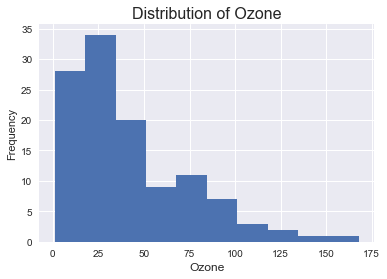

In [23]:
## Histogram of O-zone column
air_quality_df.Ozone.plot('hist')

# creating title
plt.title("Distribution of Ozone", fontsize=16)

plt.xlabel("Ozone", fontsize=12)

#showing plot
plt.show()

### Scatter Plots
* relationship between 2 numeric variables

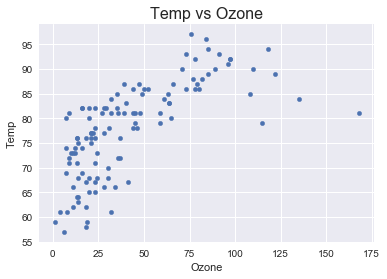

In [24]:
# creating scatter plot
air_quality_df.plot(x='Ozone', y='Temp', kind='scatter')

# creating title
plt.title("Temp vs Ozone", fontsize=16)

#showing plot
plt.show()

## Handling Missing Values

In [100]:
# Create dataframe with missing values
raw_data = {'first_name': ['Jason', np.nan, 'Tina', 'Jake', 'Amy'], 
        'last_name': ['Miller', np.nan, 'Ali', 'Milner', 'Cooze'], 
        'age': [42, np.nan, 36, 24, 73], 
        'sex': ['m', np.nan, 'f', 'm', 'f'], 
        'preTestScore': [4, np.nan, np.nan, 2, 3],
        'postTestScore': [25, np.nan, np.nan, 62, 70]}

df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'sex', 'preTestScore', 'postTestScore'])

df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [101]:
# Counting null values
df.isnull().sum()

first_name       1
last_name        1
age              1
sex              1
preTestScore     2
postTestScore    2
dtype: int64

In [90]:
## drop missing observations
df_no_missing = df.dropna()

df_no_missing

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [91]:
## Drop rows where all cells in that row is NA (default="any")
df_cleaned = df.dropna(how='all')

df_cleaned

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [102]:
## Creating a column filled with NaNs
df['location'] = np.nan
df

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


In [103]:
## Dropping a column filled with NaNs
df.dropna(axis=1, how='all')

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [104]:
# fill missing values
df_filled = df.fillna('missing') 

df_filled

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42,m,4,25,missing
1,missing,missing,missing,missing,missing,missing,missing
2,Tina,Ali,36,f,missing,missing,missing
3,Jake,Milner,24,m,2,62,missing
4,Amy,Cooze,73,f,3,70,missing


In [105]:
# Fill missing values with a test statistic
mean_value = df['preTestScore'].mean() 

print(mean_value)

3.0


In [106]:
df['preTestScore'] = df['preTestScore'].fillna(mean_value) 

df

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
1,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2,Tina,Ali,36.0,f,3.0,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


In [107]:
## Testing with assert

# Assert that preTestScore does not contain any missing values
assert pd.notnull(df.preTestScore).all()

In [108]:
# Assert that postTestScore does not contain any missing values
assert pd.notnull(df.postTestScore).all()

AssertionError: 

## Working with Columns

In [122]:
# Create an example dataframe
data = {'Commander': ['jason', 'molly', 'tina', 'jake', 'amy'],
        'Sex': ['m', 'f', 'f', 'm', 'f'],        
        'Date': ['2012, 02, 08', '2012, 02, 08', '2012, 02, 08', '2012, 02, 08', '2012, 02, 08'], 
        'Score': ['4', '24', '31', '2', '3']}
df = pd.DataFrame(data)
df

,Commander,Date,Score,Sex
0,jason,"2012, 02, 08",4,m
1,molly,"2012, 02, 08",24,f
2,tina,"2012, 02, 08",31,f
3,jake,"2012, 02, 08",2,m
4,amy,"2012, 02, 08",3,f


In [124]:
# renaming a column
df.rename(columns={'Commander': 'Leader'}, inplace=True)

df

,Leader,Date,Score,Sex
0,jason,"2012, 02, 08",4,m
1,molly,"2012, 02, 08",24,f
2,tina,"2012, 02, 08",31,f
3,jake,"2012, 02, 08",2,m
4,amy,"2012, 02, 08",3,f


In [133]:
# changing dtypes
df.dtypes

Leader    object
Date      object
Score     object
Sex       object
dtype: object

In [137]:
# Changing a numerical variable
df['Score'] = pd.to_numeric(df['Score'])

In [138]:
# Changing a categorical variable
df['Sex'] = df['Sex'].astype('category')

In [141]:
# Changing a date time variable
df['Date'] = pd.to_datetime(df['Date'])

In [142]:
df.dtypes

Leader            object
Date      datetime64[ns]
Score              int64
Sex             category
dtype: object

In [143]:
## Manipulating data 

# print the column with capitalized case
df.Leader= df.Leader.str.capitalize()

df

,Leader,Date,Score,Sex
0,Jason,2012-02-08,4,m
1,Molly,2012-02-08,24,f
2,Tina,2012-02-08,31,f
3,Jake,2012-02-08,2,m
4,Amy,2012-02-08,3,f


#### Using RegEx on Columns

In [148]:
# Create a dataframe with a single column of strings
data = {'raw': ['Arizona 1 2014-12-23       3242.0',
                'Iowa 1 2010-02-23       3453.7',
                'Oregon 0 2014-06-20       2123.0',
                'Maryland 0 2014-03-14       1123.6',
                'Florida 1 2013-01-15       2134.0',
                'Georgia 0 2012-07-14       2345.6']}
df = pd.DataFrame(data, columns = ['raw'])

df

,raw
0,Arizona 1 2014-12-23 3242.0
1,Iowa 1 2010-02-23 3453.7
2,Oregon 0 2014-06-20 2123.0
3,Maryland 0 2014-03-14 1123.6
4,Florida 1 2013-01-15 2134.0
5,Georgia 0 2012-07-14 2345.6


In [150]:
import re

# Which rows of df['raw'] contain 'xxxx-xx-xx'?
df['raw'].str.contains('....-..-..', regex=True)

0    True
1    True
2    True
3    True
4    True
5    True
Name: raw, dtype: bool

In [153]:
# In the column 'raw', extract single digit in the strings
df['female'] = df['raw'].str.extract('(\d)', expand=True)

df['female']

0    1
1    1
2    0
3    0
4    1
5    0
Name: female, dtype: object

In [154]:
# In the column 'raw', extract xxxx-xx-xx in the strings
df['date'] = df['raw'].str.extract('(....-..-..)', expand=True)

df['date']

0    2014-12-23
1    2010-02-23
2    2014-06-20
3    2014-03-14
4    2013-01-15
5    2012-07-14
Name: date, dtype: object

In [155]:
# In the column 'raw', extract ####.## in the strings
df['score'] = df['raw'].str.extract('(\d\d\d\d\.\d)', expand=True)
df['score']

0    3242.0
1    3453.7
2    2123.0
3    1123.6
4    2134.0
5    2345.6
Name: score, dtype: object

In [156]:
# In the column 'raw', extract the word in the strings
df['state'] = df['raw'].str.extract('([A-Z]\w{0,})', expand=True)
df['state']

0     Arizona
1        Iowa
2      Oregon
3    Maryland
4     Florida
5     Georgia
Name: state, dtype: object

In [157]:
df

,raw,female,date,score,state
0,Arizona 1 2014-12-23 3242.0,1,2014-12-23,3242.0,Arizona
1,Iowa 1 2010-02-23 3453.7,1,2010-02-23,3453.7,Iowa
2,Oregon 0 2014-06-20 2123.0,0,2014-06-20,2123.0,Oregon
3,Maryland 0 2014-03-14 1123.6,0,2014-03-14,1123.6,Maryland
4,Florida 1 2013-01-15 2134.0,1,2013-01-15,2134.0,Florida
5,Georgia 0 2012-07-14 2345.6,0,2012-07-14,2345.6,Georgia


## Working with the Index

In [144]:
# reset index / specifying index
# Create a dataframe
data = {'county': ['Cochice', 'Pima', 'Santa Cruz', 'Maricopa', 'Yuma'], 
        'year': [2012, 2012, 2013, 2014, 2014], 
        'reports': [4, 24, 31, 2, 3]}

df = pd.DataFrame(data)
df

,county,reports,year
0,Cochice,4,2012
1,Pima,24,2012
2,Santa Cruz,31,2013
3,Maricopa,2,2014
4,Yuma,3,2014


In [145]:
# Indexing using square brackets
df['reports'][1]

24

In [146]:
# Indexing using .loc accessor
df.loc[1, 'reports']

24

In [147]:
# Indexing using the .iloc accessor
df.iloc[1,1]

24

In [112]:
# Change the order (the index) of the rows
df.reindex([4, 3, 2, 1, 0])

,county,reports,year
4,Yuma,3,2014
3,Maricopa,2,2014
2,Santa Cruz,31,2013
1,Pima,24,2012
0,Cochice,4,2012


In [113]:
# column indexing
# Change the order (the index) of the columns
columnsTitles = ['year', 'reports', 'county']
df.reindex(columns=columnsTitles)

,year,reports,county
0,2012,4,Cochice
1,2012,24,Pima
2,2013,31,Santa Cruz
3,2014,2,Maricopa
4,2014,3,Yuma


## Reshaping Data

### Tidy Data
1. Columns represent separate variables
2. Rows represent individual observations
3. Observational units form tables

#### Example

In [51]:
names = ['Daniel', 'John', 'Jane', 'Mike']
treatment_a = [18, 26, 24, 25]
treatment_b = [42, 31, 27, 22]
sex = ["male", "male", "female", "male"]

data = {'name': names, 'treatment_a': treatment_a, 'treatment_b': treatment_b, "sex": sex}

In [52]:
df = pd.DataFrame(data)

In [53]:
df

,name,sex,treatment_a,treatment_b
0,Daniel,male,18,42
1,John,male,26,31
2,Jane,female,24,27
3,Mike,male,25,22


    Is this tidy data? 
    
            No: Columns contain values, not variables.

## Melting Data
Solution: pd.melt()

In [56]:
new_df = pd.melt(frame=df, 
                 id_vars=["name", "sex"],
                 value_vars=['treatment_a', 'treatment_b'])

new_df

,name,sex,variable,value
0,Daniel,male,treatment_a,18
1,John,male,treatment_a,26
2,Jane,female,treatment_a,24
3,Mike,male,treatment_a,25
4,Daniel,male,treatment_b,42
5,John,male,treatment_b,31
6,Jane,female,treatment_b,27
7,Mike,male,treatment_b,22


In [67]:
# naming variable and value
new_df = pd.melt(frame=df, 
                 id_vars=["name", "sex"], 
                 value_vars=['treatment_a', 'treatment_b'],
                 var_name = 'treatment',
                 value_name = 'result'
                )

new_df

,name,sex,treatment,result
0,Daniel,male,treatment_a,18
1,John,male,treatment_a,26
2,Jane,female,treatment_a,24
3,Mike,male,treatment_a,25
4,Daniel,male,treatment_b,42
5,John,male,treatment_b,31
6,Jane,female,treatment_b,27
7,Mike,male,treatment_b,22


In [68]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
name         8 non-null object
sex          8 non-null object
treatment    8 non-null object
result       8 non-null int64
dtypes: int64(1), object(3)
memory usage: 336.0+ bytes


In [69]:
## Converting categorical data
new_df['sex'] = new_df['sex'].astype('category') 
new_df['treatment'] = new_df['treatment'].astype('category') 

In [70]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
name         8 non-null object
sex          8 non-null category
treatment    8 non-null category
result       8 non-null int64
dtypes: category(2), int64(1), object(1)
memory usage: 416.0+ bytes


#### Another Example

In [27]:
# Melt airquality: airquality_melt
airquality_melt = pd.melt(frame = air_quality_df, id_vars=['Month', 'Day'],
                         var_name='measurement', value_name='reading')

# Print the head of airquality_melt
print(airquality_melt.head())

   Month  Day measurement  reading
0      5    1       Ozone     41.0
1      5    2       Ozone     36.0
2      5    3       Ozone     12.0
3      5    4       Ozone     18.0
4      5    5       Ozone      NaN


In [49]:
print(airquality_melt.tail())

     Month  Day measurement  reading
607      9   26        Temp     70.0
608      9   27        Temp     77.0
609      9   28        Temp     75.0
610      9   29        Temp     76.0
611      9   30        Temp     68.0


## Pivoting Data
Solution: pd.pivot()

    ● Opposite of melting
    ● In melting, we turned columns into rows
    ● Pivoting: turn unique values into separate columns 

In [39]:
# Pivot airquality_melt: airquality_pivot
airquality_pivot = pd.pivot_table(data = airquality_melt, 
                                  index=['Month', 'Day'], 
                                  columns='measurement', 
                                  values='reading')

# Print the head of airquality_pivot
print(airquality_pivot.head())


measurement  Ozone  Solar.R  Temp  Wind
Month Day                              
5     1       41.0    190.0  67.0   7.4
      2       36.0    118.0  72.0   8.0
      3       12.0    149.0  74.0  12.6
      4       18.0    313.0  62.0  11.5
      5        NaN      NaN  56.0  14.3


In [40]:
# Reset the index of airquality_pivot: airquality_pivot
airquality_pivot = airquality_pivot.reset_index()

airquality_pivot.head()

measurement,Month,Day,Ozone,Solar.R,Temp,Wind
0,5,1,41.0,190.0,67.0,7.4
1,5,2,36.0,118.0,72.0,8.0
2,5,3,12.0,149.0,74.0,12.6
3,5,4,18.0,313.0,62.0,11.5
4,5,5,NaN,NaN,56.0,14.3


 ● Has a parameter that speciﬁes how to deal with duplicate values
 
 ● Example: Can aggregate the duplicate values by taking their   average  (aggfunc=np.mean)

In [158]:
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'], 
        'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'], 
        'TestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3]}
df = pd.DataFrame(raw_data, columns = ['regiment', 'company', 'TestScore'])
df

,regiment,company,TestScore
0,Nighthawks,1st,4
1,Nighthawks,1st,24
2,Nighthawks,2nd,31
3,Nighthawks,2nd,2
4,Dragoons,1st,3
5,Dragoons,1st,4
6,Dragoons,2nd,24
7,Dragoons,2nd,31
8,Scouts,1st,2
9,Scouts,1st,3


In [159]:
pd.pivot_table(df, index=['regiment','company'], aggfunc='mean')

TestScore
regiment   company           
Dragoons   1st            3.5
           2nd           27.5
Nighthawks 1st           14.0
           2nd           16.5
Scouts     1st            2.5
           2nd            2.5

## Tidy Data Review

● Rows form observations 

● Columns form variables 

● Tidying data will make data cleaning easier 

● Melting turns columns into rows 

● Pivot will take unique values from a column and create new columns